<a href="https://colab.research.google.com/github/gowtham123-pro/inspie-implicit/blob/master/img_cartoon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from google.colab import files

In [18]:
def ReadFile(f_name):
  i=cv2.imread(f_name)
  cv2_imshow(i)
  return i


In [36]:
def color_quantization(img,k):
  data=np.float32(img).reshape((-1,3))
  criteria=(cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,20,0.001)
  ret,label,center=cv2.kmeans(data,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
  result=center[label.flatten()]
  result=result.reshape(img.shape)
  return result

In [33]:
def edge_mask(img,line_size,blur_value):
  gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
  gray_blur=cv2.medianBlur(gray,blur_value)
  edges=cv2.adaptiveThreshold(gray_blur,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,line_size,blur_value)
  return edges

Saving gs.jpg to gs.jpg


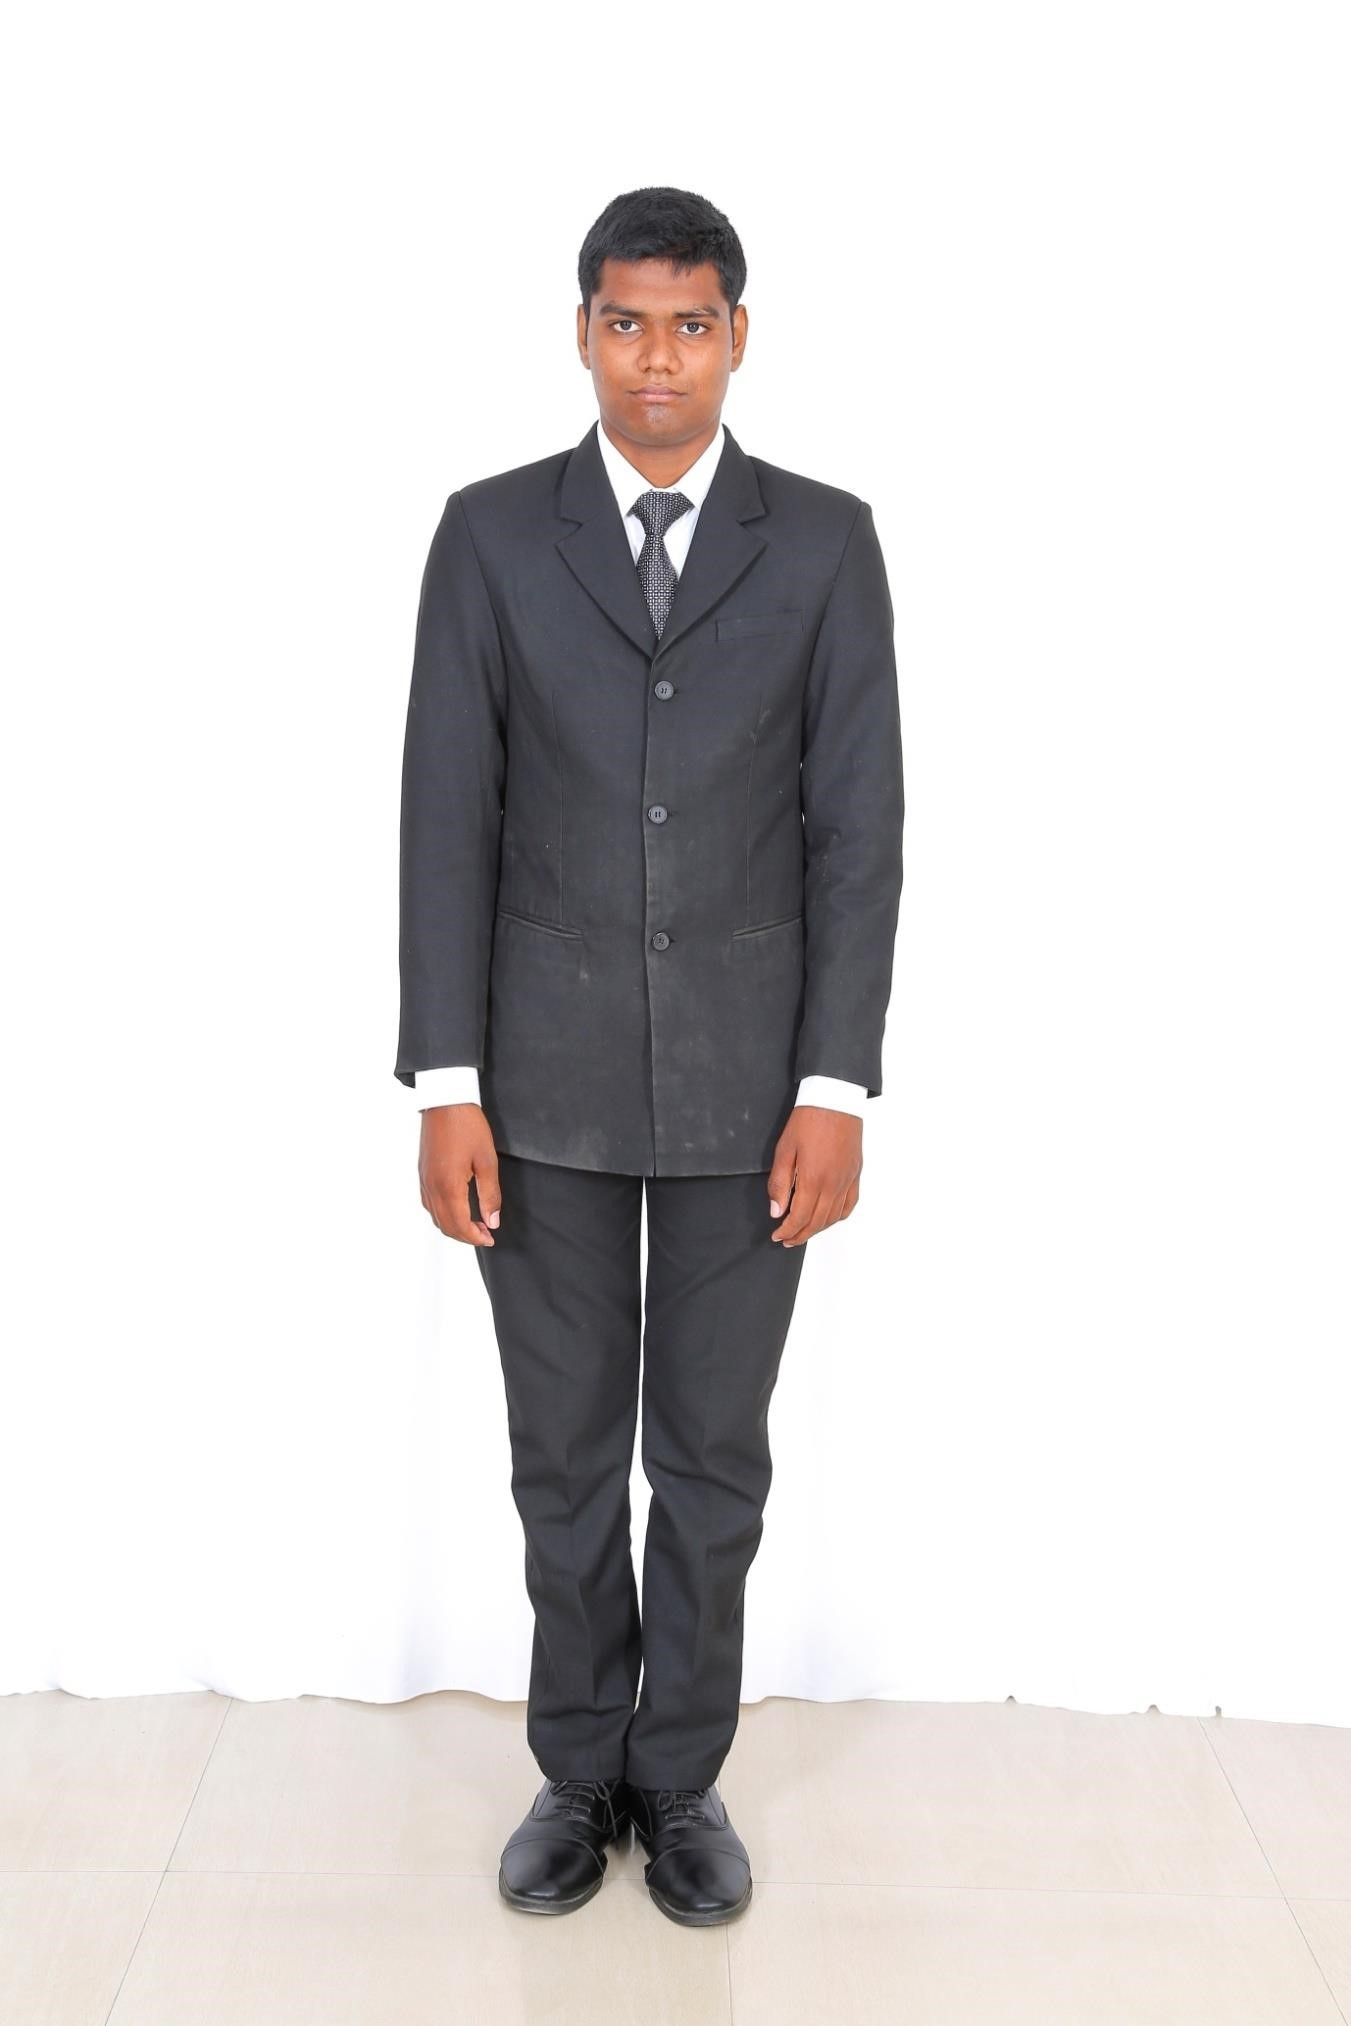

In [41]:
up=files.upload()
fname=next(iter(up))
img=ReadFile(fname)

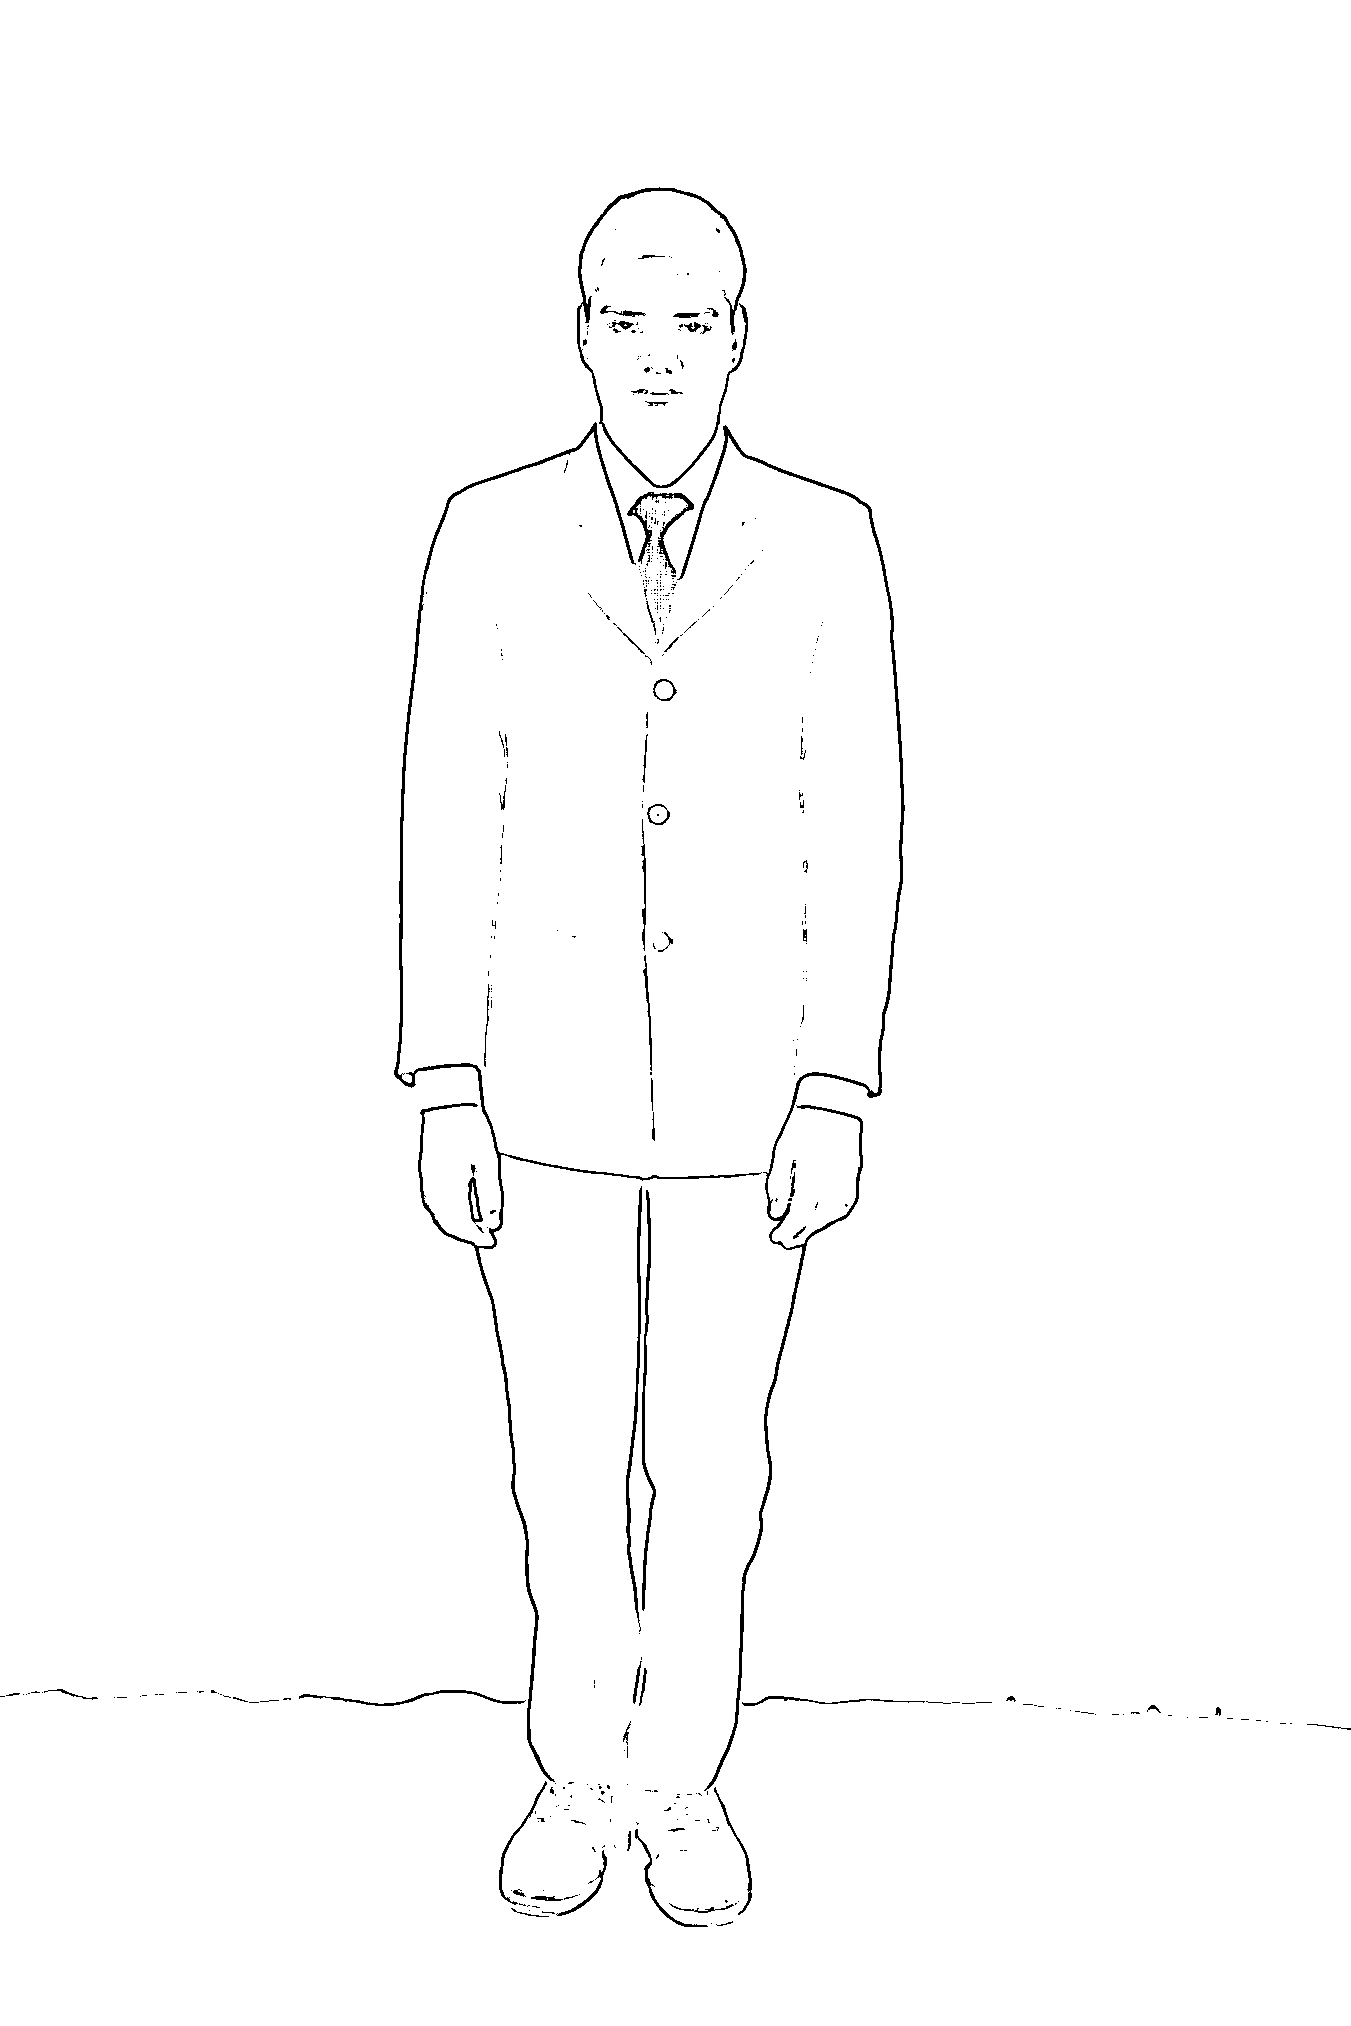

In [42]:
edges=edge_mask(img,7,7)
cv2_imshow(edges)

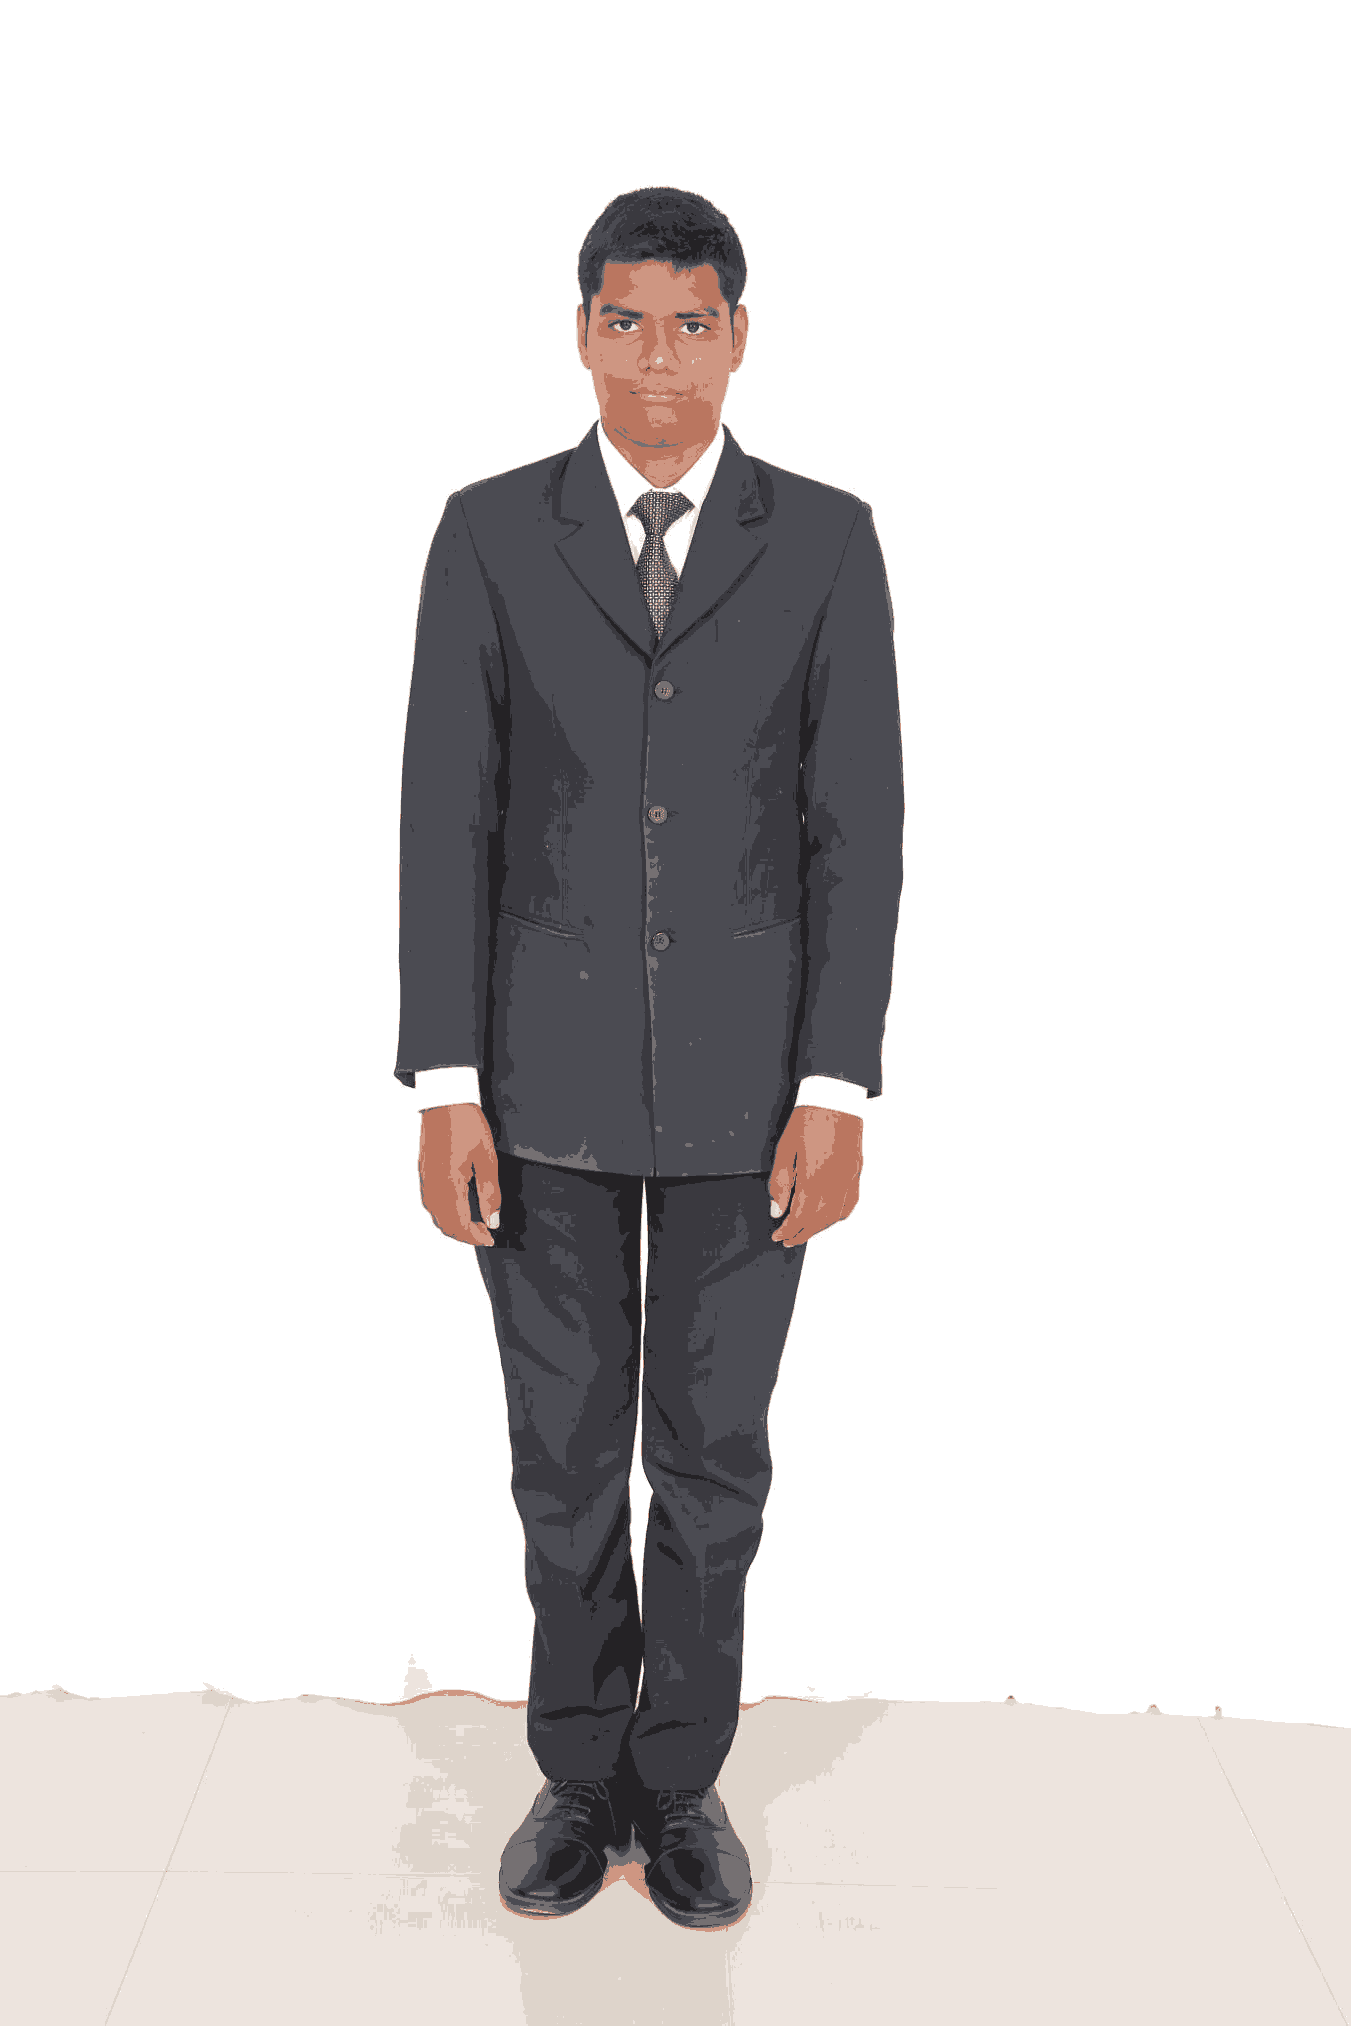

In [43]:
img=color_quantization(img,9)
cv2_imshow(img)

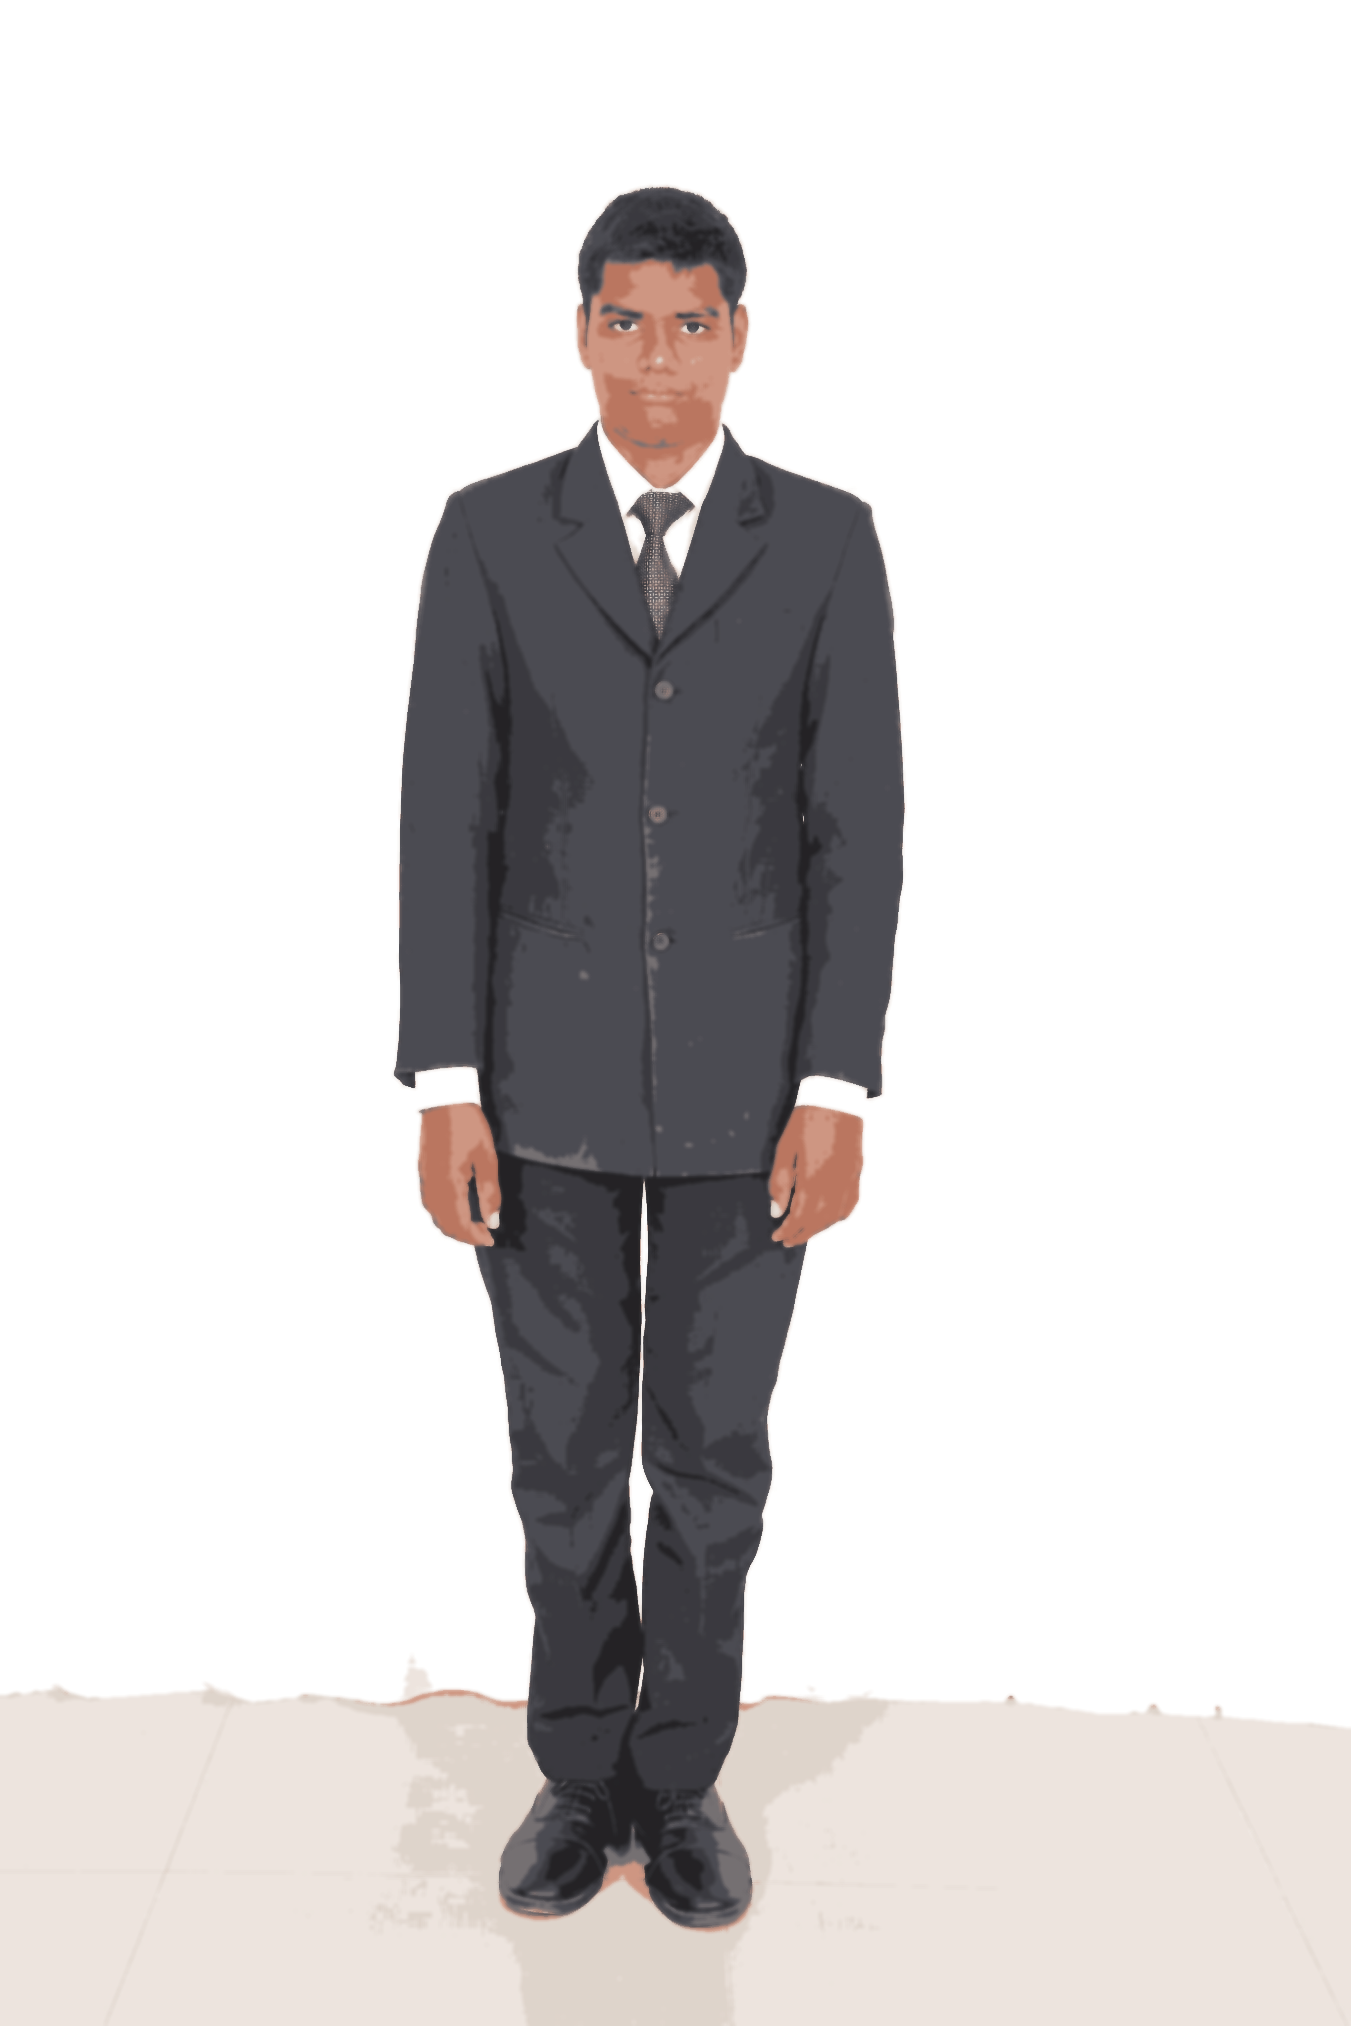

In [44]:
blurred=cv2.bilateralFilter(img,d=7,sigmaColor=200,sigmaSpace=200)
cv2_imshow(blurred)

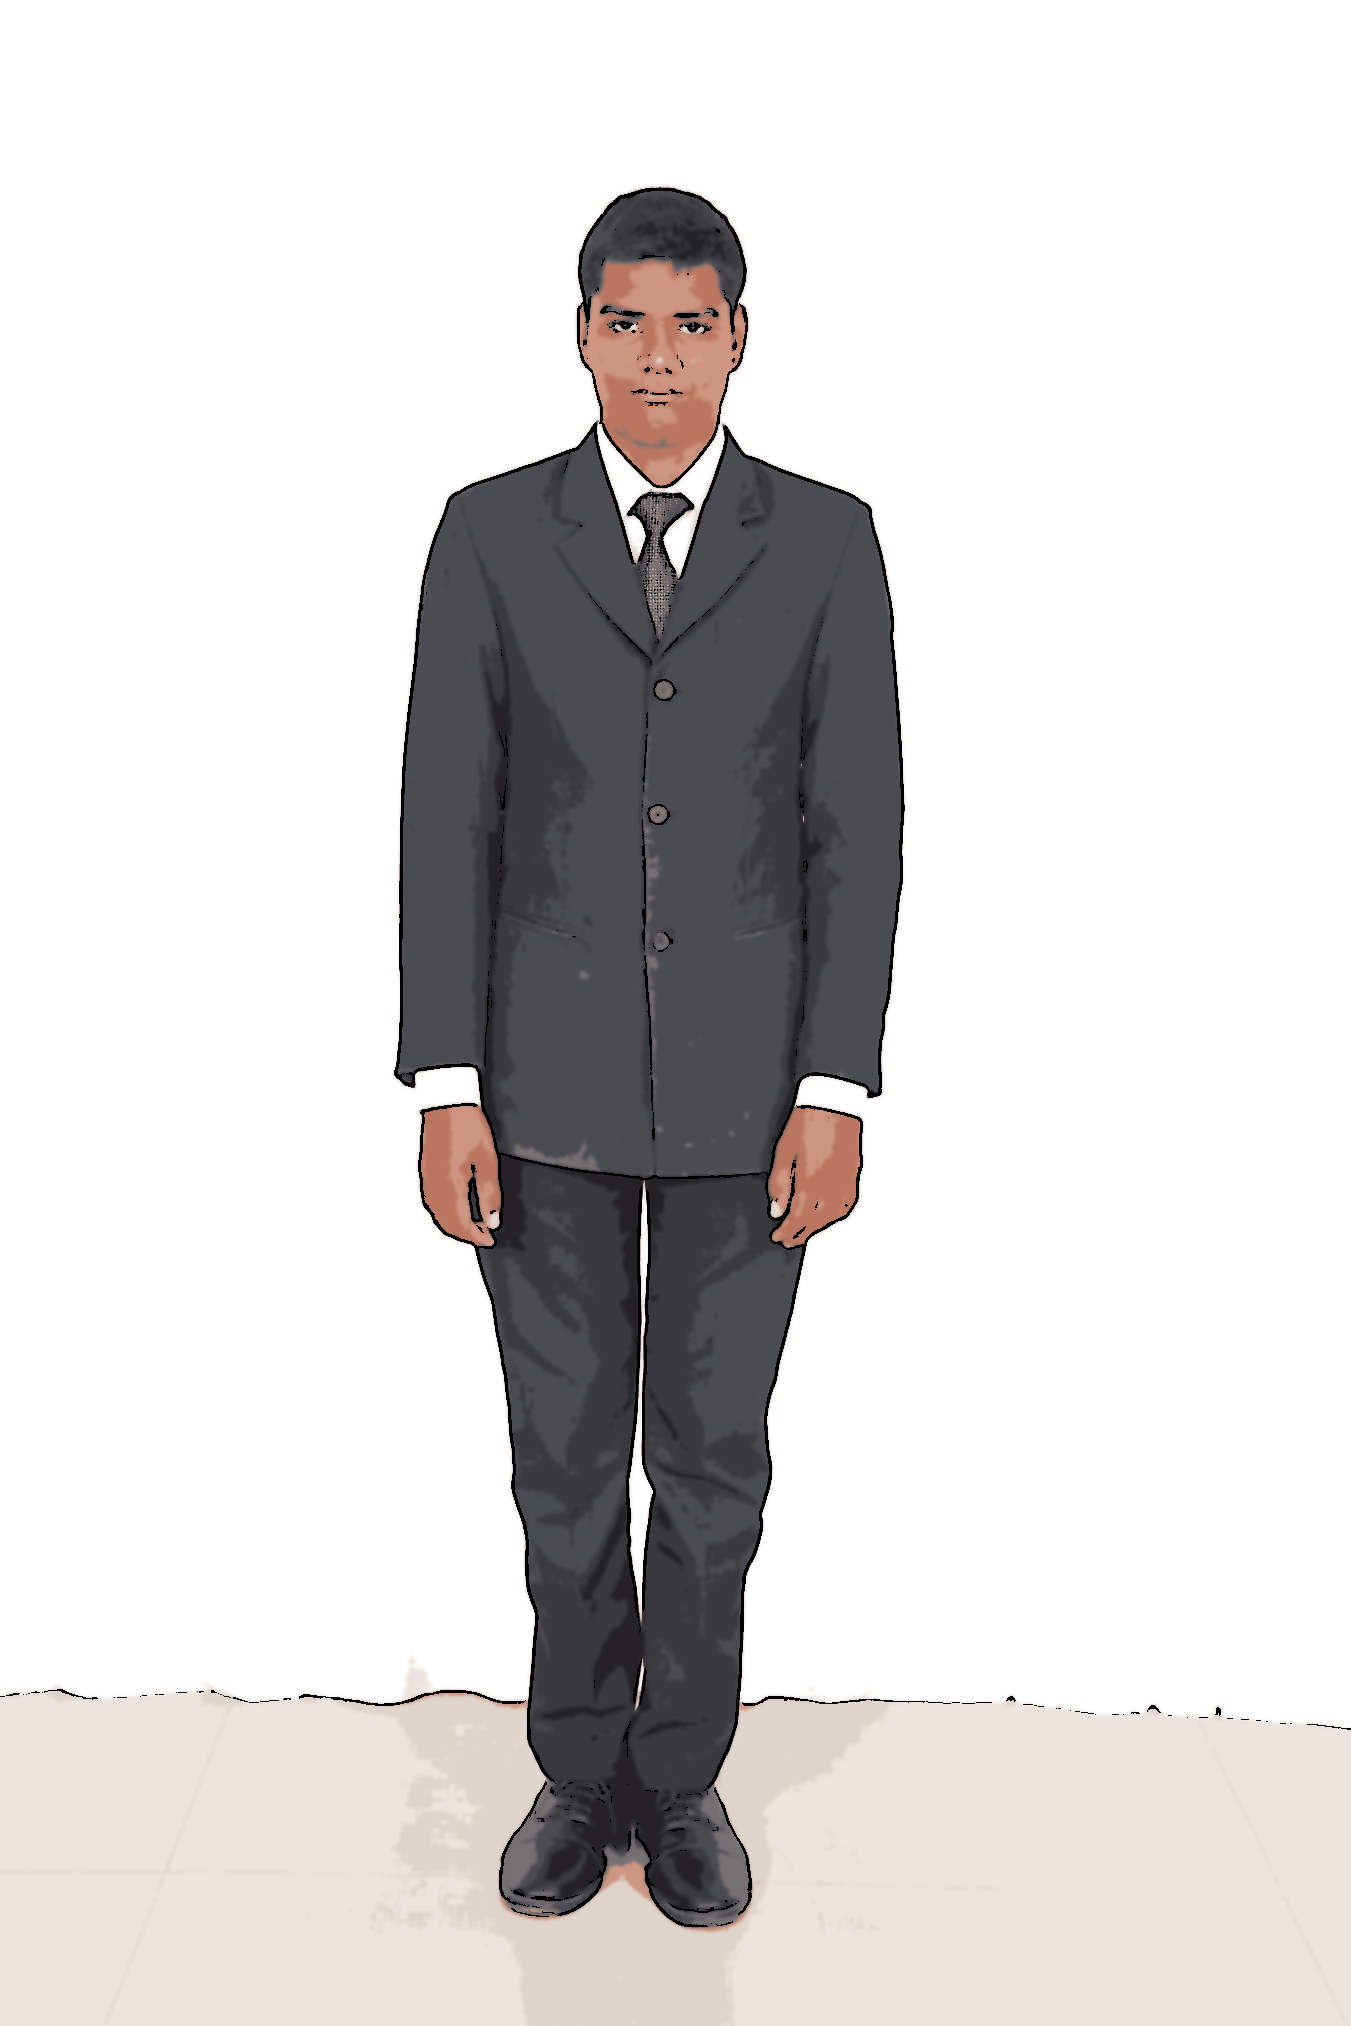

In [45]:
cartoon=cv2.bitwise_and(blurred,blurred,mask=edges)
cv2_imshow(cartoon)